# Modello Sandpile

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [30]:
N=20 # con questi dati inziali è come se sto mettendo ogni volta molta sabbia  perche E=4 quindi la massa cresce più velocemente
E=0.1
critical_slope=5
n_iter=10000 #iterazioni necessarie per raggiungere lo stato di stazionarietà

In [31]:
sand=np.zeros(N) #questo array è quello chiamiamo S_j e contiene 
                #la quantità di sabbia in ogni nodo del reticolo 
                #ad ogni iterazione. iniziamo tutto a zero
tsav=np.zeros(n_iter) #quantità di sabbia spostata ad ogni iterazione
mass=np.zeros(n_iter)

iterate indica il periodo temporale n
slope è quello che calcoliamo come z_j^n
       se slope supera Z_c cioè il valore critico preimpostato, allora la coppia nodale (j,j+1) è instabile e i granelli
       quindi cadono verso il basso 

# Se la sabbia cade in punti casuali del reticolo..

In [82]:
for iterate in range(0,n_iter): #quante iterazioni in totale faccio
    move=np.zeros(N)
    for j in range(0,N-1): # ad ogni itarazione calcolo quale coppia è instabile
        slope=abs(sand[j+1]-sand[j])
        #print(slope)
        if slope >= critical_slope: #testo la stabilità e ridistribuisco
            avrg=(sand[j]+sand[j+1])/2 #questo è S segnato
            move[j]+=(avrg-sand[j])/2  # equazioni 
            move[j+1]+=(avrg-sand[j+1])/2
            tsav[iterate]+=slope/4 #quantità di sabbia spostata
   
    if tsav[iterate]>0: #se maggiore di zero significa che c'è stato uno spostamento di massa
        sand+=move
    else: # questa cosa la facciamo slo se tutti i nodi sono stabili
        j=np.random.randint(0,N-1) #su un punto a caso del reticolo aggiungo una quantità di sabbia
        sand[j]+=np.random.uniform(0,E)
            
    sand[N-1]=0 # tolgo la sabbia all'ultimo nodo condizioni al contorno
    mass[iterate]=np.sum(sand) # massa totale in questa iterazione
    
    if iterate%10000==0:
        print iterate

   # print("{0},mass {1}, tsav {2}.".format(iterate,mass[iterate],tsav[iterate]))    

0
10000


KeyboardInterrupt: 

In [32]:
#velocizzato
r=0
a=0
for iterate in range(0,n_iter): #quante iterazioni in totale faccio
    move=np.zeros(N)
    #print r
    if a==1:
        for j in range(0,N-1): # ad ogni itarazione calcolo quale coppia è instabile
            slope=abs(sand[j+1]-sand[j])
            #print(slope)
            if slope >= critical_slope: #testo la stabilità e ridistribuisco
                avrg=(sand[j]+sand[j+1])/2 #questo è S segnato
                move[j]+=(avrg-sand[j])/2  # equazioni 
                move[j+1]+=(avrg-sand[j+1])/2
                tsav[iterate]+=slope/4 #quantità di sabbia spostata
   
    else:
        for j in range(r-1,r+2): # ad ogni itarazione calcolo quale coppia è instabile
        
            if j==-1 or j==N-1 or j==N:
                break    
            else:
                slope=abs(sand[j+1]-sand[j])
                #print(slope)
                if slope >= critical_slope: #testo la stabilità e ridistribuisco
                    avrg=(sand[j]+sand[j+1])/2 #questo è S segnato
                    move[j]+=(avrg-sand[j])/2  # equazioni 
                    move[j+1]+=(avrg-sand[j+1])/2
                    tsav[iterate]+=slope/4 #quantità di sabbia spostata
   
    if tsav[iterate]>0: #se maggiore di zero significa che c'è stato uno spostamento di massa
        sand+=move
        a=1
    else: # questa cosa la facciamo slo se tutti i nodi sono stabili
        j=np.random.randint(0,N-1) #su un punto a caso del reticolo aggiungo una quantità di sabbia
        sand[j]+=np.random.uniform(0,E)
        r=j
        a=0
        #print j
           
    sand[N-1]=0 # tolgo la sabbia all'ultimo nodo condizioni al contorno
    mass[iterate]=np.sum(sand) # massa totale in questa iterazione
    
    #out_file.write("{0},mass {1}, tsav {2}.\r".format(iterate,mass[iterate],tsav[iterate]))
    if iterate%100000==0:
        #print iterate
        print("{0},mass {1}, tsav {2}.".format(iterate,mass[iterate],tsav[iterate]))    

0,mass 0.00689880080188, tsav 0.0.


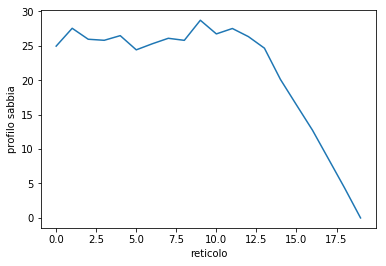

In [33]:
plt.plot(range(0,N),sand)
plt.ylabel("profilo sabbia")
plt.xlabel("reticolo")
plt.show()

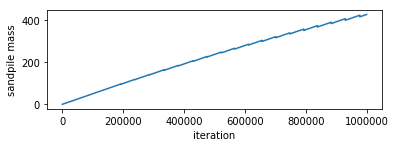

In [19]:
plt.subplot(2,1,1)
plt.plot(range(0,n_iter),mass)
plt.ylabel("sandpile mass")
plt.xlabel("iteration")
#plt.subplot(2,1,2)
#plt.plot(range(0,n_iter),tsav)
#plt.ylabel("Displaced mass")
#plt.xlabel("iteration")
plt.show()

In [18]:
def func(x, a, b):
    return a+x*b

In [22]:
popt, pcov = curve_fit(func,range(0,20),sand[80:100])
popt[1]

-4.1732999406677873

# ...E se i granelli cadessero tutti su un punto (più o meno centrale)?

In [23]:
N=50 # con questi dati inziali è come se sto mettendo ogni volta molta sabbia  perche E=4 quindi la massa cresce più velocemente
E=0.1
critical_slope=5
n_iter=200000 #iterazioni necessarie per raggiungere lo stato di stazionarietà

sand=np.zeros(N) #questo array è quello chiamiamo S_j e contiene 
                #la quantità di sabbia in ogni nodo del reticolo 
                #ad ogni iterazione. iniziamo tutto a zero
tsav=np.zeros(n_iter) #quantità di sabbia spostata ad ogni iterazione
mass=np.zeros(n_iter)

0


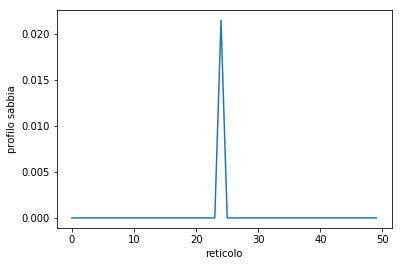

10000


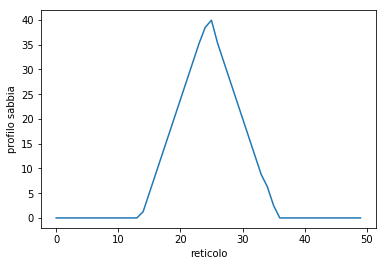

20000


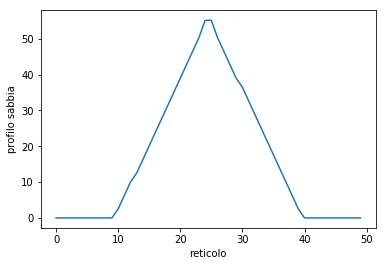

30000


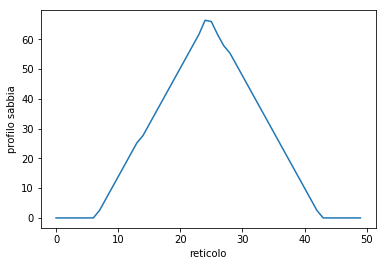

40000


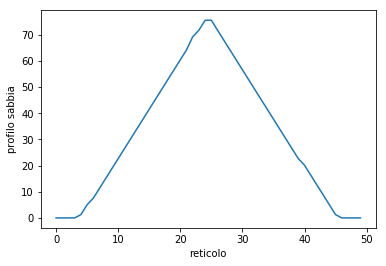

50000


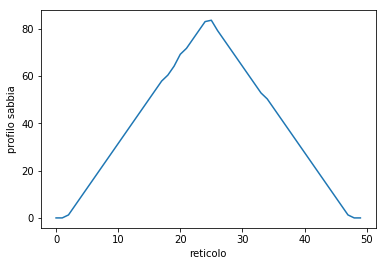

60000


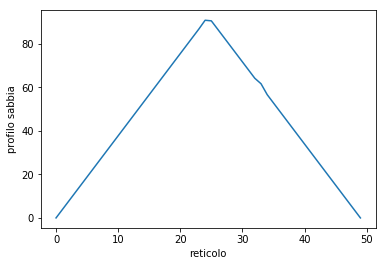

70000


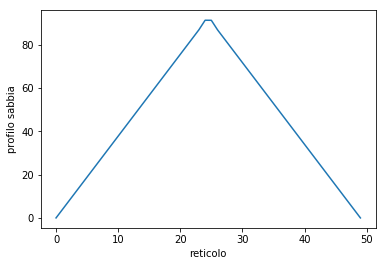

80000


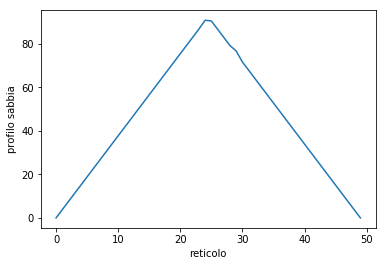

90000


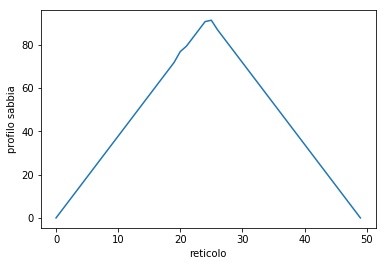

100000


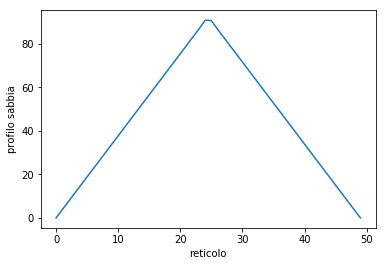

110000


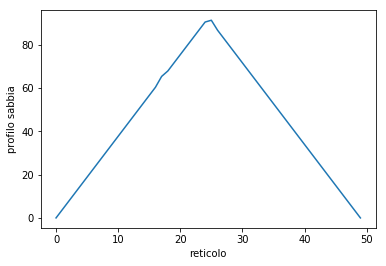

120000


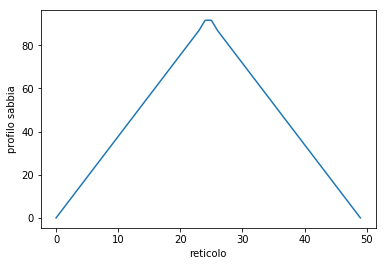

130000


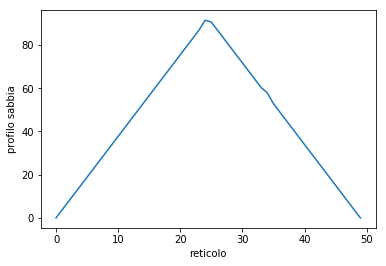

140000


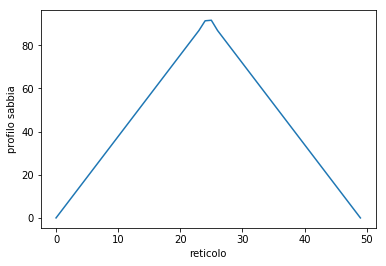

150000


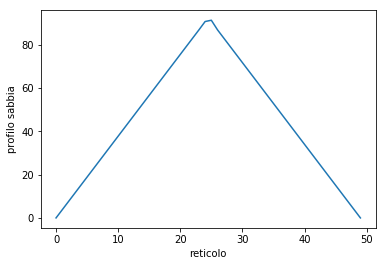

160000


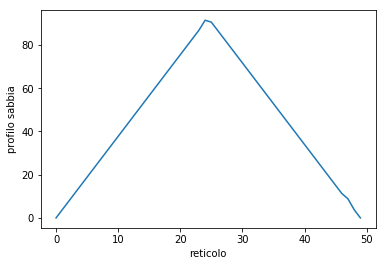

170000


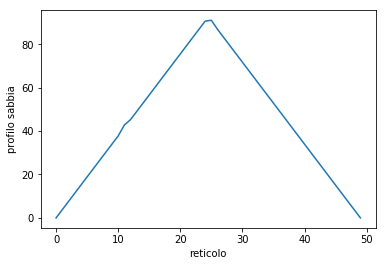

180000


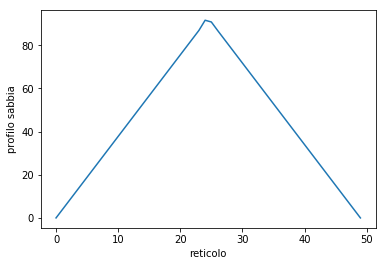

190000


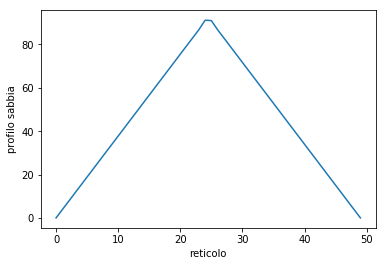

In [24]:
for iterate in range(0,n_iter): #quante iterazioni in totale faccio
    move=np.zeros(N)
    for j in range(0,N-1): # ad ogni itarazione calcolo quale coppia è instabile
        slope=abs(sand[j+1]-sand[j])
        #print(slope)
        if slope >= critical_slope: #testo la stabilità e ridistribuisco
            avrg=(sand[j]+sand[j+1])/2 #questo è S segnato
            move[j]+=(avrg-sand[j])/2  # equazioni 
            move[j+1]+=(avrg-sand[j+1])/2
            tsav[iterate]+=slope/4 #quantità di sabbia spostata
   
    if tsav[iterate]>0: #se maggiore di zero significa che c'è stato uno spostamento di massa
        sand+=move
    else: # questa cosa la facciamo slo se tutti i nodi sono stabili
        j=abs(int(np.random.normal(N//2, 0.1))) #su un punto a caso del reticolo aggiungo una quantità di sabbia
        sand[j]+=np.random.uniform(0,E)
    
    sand[0]=0  # tolgo la sabbia al primo nodo condizioni al contorno      
    sand[N-1]=0 # tolgo la sabbia all'ultimo nodo condizioni al contorno
    mass[iterate]=np.sum(sand) # massa totale in questa iterazione
    
    if iterate%10000==0:
        print iterate
        plt.plot(range(0,N),sand)
        plt.ylabel("profilo sabbia")
        plt.xlabel("reticolo")
        plt.show()

   # print("{0},mass {1}, tsav {2}.".format(iterate,mass[iterate],tsav[iterate]))    

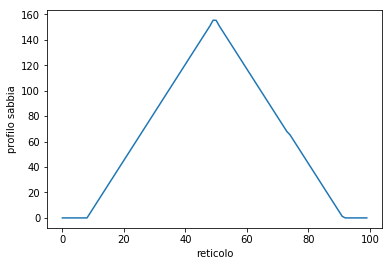

In [9]:
plt.plot(range(0,N),sand)
plt.ylabel("profilo sabbia")
plt.xlabel("reticolo")
plt.show()

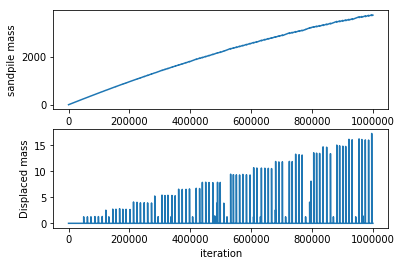

In [8]:
plt.subplot(2,1,1)
plt.plot(range(0,n_iter),mass)
plt.ylabel("sandpile mass")
plt.xlabel("iteration")
plt.subplot(2,1,2)
plt.plot(range(0,n_iter),tsav)
plt.ylabel("Displaced mass")
plt.xlabel("iteration")
plt.show()

# Disegnare profilo sabbia

In [32]:
r=9
matrix=np.zeros((r,N))

for i in range(1,r+1):
    sand=np.zeros(N) 
    tsav=np.zeros(i*(10**5)) 
    mass=np.zeros(i*(10**5))
    falloff=np.zeros(i*(10**5))
    
    for iterate in range(0,i*(10**5)):#quante iterazioni in totale faccio
        move=np.zeros(N)
        for j in range(0,N-1): # ad ogni itarazione calcolo quale coppia è instabile
            slope=abs(sand[j+1]-sand[j])
            #print(slope)
            if slope >= critical_slope: #testo la stabilità e ridistribuisco
                avrg=(sand[j]+sand[j+1])/2 #questo è S segnato
                move[j]+=(avrg-sand[j])/2  # equazioni 
                move[j+1]+=(avrg-sand[j+1])/2
                tsav[iterate]+=slope/4 #quantità di sabbia spostata
   
        if tsav[iterate]>0: #se maggiore di zero significa che c'è stato uno spostamento di massa
            sand+=move
        else: # questa cosa la facciamo slo se tutti i nodi sono stabili
            j=abs(int(np.random.normal(N//2, 0.1))) #su un punto a caso del reticolo aggiungo una quantità di sabbia
            sand[j]+=np.random.uniform(0,E)
            
        sand[N-1]=0 # tolgo la sabbia all'ultimo nodo condizioni al contorno
        mass[iterate]=np.sum(sand)
        
        if iterate%10000==0:
            print iterate
            
    print i 
    
    for j in range(0,N-1):
        matrix[i-1][j]=sand[j]

sand_file = open("monte_tot.txt","w")

for i in range(0,9):    
    for j in range(0,N):
        sand_file.write("{1} ".format(i,matrix[i][j]))
    sand_file.write("\r")  

sand_file.close()

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
1
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
2
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
3
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
4
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
5
0
10000
20

# Definizione funzione

In [7]:
def measure_av(n_iter,tsav): #funzione che restituisce l'energia , il picco 
   
    n_max_av=10000 #massimo numero di valanghe
    e_av=np.zeros(n_max_av) #energia somma di tutte le masse spostate per la durata della valanga
    p_av=np.zeros(n_max_av) #picco il più grande valore di M prodotto nel corso della valanga
    t_av=np.zeros(n_max_av) #durata della valanga, il numero di iterazioni trascorse da inizio di uuna valanga all'ultima ridistribuzione
    n_av,somma,istart,avmax=-1,0,0,0
    
    for iterate in range(1,n_iter): #devo trovare quando inizia la valanga e inizia quando la sabbia spostata è maggiore di zero
        if tsav[iterate]>0 and tsav[iterate-1]==0: #ovviamento al passaggio precedente non ci deve essere spostamento
            somma,avmax=0,0 #finisce la valanga a iterate-1 se tsav(iterate-1)>0 e tsav(iterate)=0
            istart=iterate
            if n_av==n_max_av-1: #test di salvezza
                print("troppe valanghe")
                break
            n_av+=1 
        somma+=tsav[iterate] #massa spostata accumulata
        if tsav[iterate]>avmax: #per il picco avmax all'inizio è zero, 
            avmax=tsav[iterate] #poi ad ogni iterazione della valanga la massa spostata cresce e se cresce di più è il nuovo picco
        if tsav[iterate]<=0 and tsav[iterate-1]>0:
            e_av[n_av]=somma
            p_av[n_av]=avmax
            t_av[n_av]=iterate-istart
                
    return n_av,e_av,p_av,t_av

In [213]:
n_av,e_av,p_av,t_av=measure_av(n_iter,tsav) #essendo diverse le valanghe le studio

In [214]:
n_av

1744

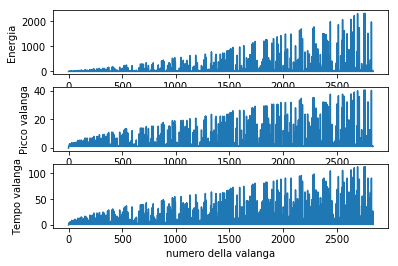

In [117]:
plt.subplot(3,1,1)
plt.plot(range(0,n_av),e_av[:n_av])
plt.ylabel("Energia")

plt.subplot(3,1,2)
plt.plot(range(0,n_av),p_av[:n_av])
plt.ylabel("Picco valanga")

plt.subplot(313)
plt.plot(range(0,n_av),t_av[:n_av])
plt.ylabel("Tempo valanga")
plt.xlabel("numero della valanga")
plt.show()

# ESERCIZI

- cambia i dati iniziali e verifica che l'angolazione finale è indipendente dalle condizioni iniziali !

In [54]:
matrix=np.zeros((9,N))

In [35]:
for i in range(1,10):
    sand=np.zeros(N) 
    tsav=np.zeros(i*(10**5)) 
    mass=np.zeros(i*(10**5))
    falloff=np.zeros(i*(10**5))
    
    for iterate in range(0,i*(10**5)):#quante iterazioni in totale faccio
        move=np.zeros(N)
        for j in range(0,N-1): # ad ogni itarazione calcolo quale coppia è instabile
            slope=abs(sand[j+1]-sand[j])
            #print(slope)
            if slope >= critical_slope: #testo la stabilità e ridistribuisco
                avrg=(sand[j]+sand[j+1])/2 #questo è S segnato
                move[j]+=(avrg-sand[j])/2  # equazioni 
                move[j+1]+=(avrg-sand[j+1])/2
                tsav[iterate]+=slope/4 #quantità di sabbia spostata
   
        if tsav[iterate]>0: #se maggiore di zero significa che c'è stato uno spostamento di massa
            sand+=move
        else: # questa cosa la facciamo slo se tutti i nodi sono stabili
            j=np.random.randint(0,N-1) #su un punto a caso del reticolo aggiungo una quantità di sabbia
            sand[j]+=np.random.uniform(0,E)
            
        sand[N-1]=0 # tolgo la sabbia all'ultimo nodo condizioni al contorno
        mass[iterate]=np.sum(sand)
    
    print i   
    for j in range(0,N-1):
        matrix[i-1][j]=sand[j]

[ 51.3331459   48.95379509  49.76729248  47.98220019  48.9879882
  51.46844218  50.4542121   51.681397    47.83090887  49.92114882
  49.87640183  49.25158718  48.3007441   51.33502909  49.75039716
  49.16119869  50.94304883  49.44620558  50.21214912  51.84091982
  50.44851277  50.70660367  53.63343491  51.40649476  49.13394225
  51.26127375  50.96429762  50.85873694  50.52647994  49.82003747
  49.42622452  50.91874347  50.13612907  49.84294562  50.90397973
  51.81254103  51.5796052   50.82890946  49.23650139  49.77752714
  48.74151143  49.42288155  52.24498857  48.82123441  47.8069659
  51.83172678  47.48133939  47.68863032  46.61410555  50.04262254
  48.33387308  52.23998732  49.05642751  51.89518824  48.62643869
  51.28069135  53.42388562  49.47805873  51.10300128  54.2201062
  52.21873534  53.26680974  51.33634043  49.89465641  49.87375425
  49.56087707  52.00916489  51.94079282  52.10448793  47.46274836
  51.67968118  50.53756237  51.90837444  49.58560199  52.35459477
  50.21815848

[ 331.02538169  333.30470933  335.66540197  339.25541085  335.93152519
  333.87621812  332.39599895  333.27628632  331.41361318  331.81801017
  332.99552438  336.28505877  340.20826111  338.89625924  336.64039413
  334.03377587  335.28454391  337.05779737  338.226102    334.56264749
  330.57506868  326.19999317  321.98171285  317.99897045  313.97006211
  309.76896787  305.60662529  301.71995533  297.52871733  293.43871658
  289.08041962  285.01305814  281.08091937  276.8611937   272.54721864
  268.55901843  264.61215879  260.15300211  255.9256043   251.97117314
  247.7615305   243.52012658  239.42461473  235.38178651  231.3618536
  226.86213931  222.96858495  218.87633661  214.70366894  210.31051256
  206.34316522  202.1603326   197.71345353  193.86509522  189.28222124
  185.34666308  180.96029932  177.09977001  172.37328796  168.07316093
  164.0588234   159.67450631  155.56943569  151.45485162  147.14142909
  143.05596021  138.6917582   134.45602309  130.31912686  126.12280687
  121.8

In [37]:
sand_file = open("sand_tot.txt","w")

for i in range(0,9):    
    for j in range(0,N):
        #sand_file.write("{1} ".format(i,matrix[i][j]))
    #sand_file.write("\r")  

sand_file.close()

In [38]:
slopefinale = sand[N-2]
print slopefinale

4.38951660584


stessa altezza della sabbia all'inizio

In [39]:
matrix=np.zeros((9,N))
for i in range(1,10):
    sand=np.ones(N) 
    tsav=np.zeros(i*(10**5)) 
    mass=np.zeros(i*(10**5))
        
    for iterate in range(0,i*(10**5)):#quante iterazioni in totale faccio
        move=np.zeros(N)
        for j in range(0,N-1): # ad ogni itarazione calcolo quale coppia è instabile
            slope=abs(sand[j+1]-sand[j])
            #print(slope)
            if slope >= critical_slope: #testo la stabilità e ridistribuisco
                avrg=(sand[j]+sand[j+1])/2 #questo è S segnato
                move[j]+=(avrg-sand[j])/2  # equazioni 
                move[j+1]+=(avrg-sand[j+1])/2
                tsav[iterate]+=slope/4 #quantità di sabbia spostata
   
        if tsav[iterate]>0: #se maggiore di zero significa che c'è stato uno spostamento di massa
            sand+=move
        else: # questa cosa la facciamo slo se tutti i nodi sono stabili
            j=np.random.randint(0,N-1) #su un punto a caso del reticolo aggiungo una quantità di sabbia
            sand[j]+=np.random.uniform(0,E)
            
        sand[N-1]=0 # tolgo la sabbia all'ultimo nodo condizioni al contorno
        mass[iterate]=np.sum(sand)
    
    print i   
    for j in range(0,N-1):
        matrix[i-1][j]=sand[j]

1
2
3
4
5
6
7
8
9


In [40]:
sand_file = open("sand1.txt","w")

for i in range(0,9):    
    for j in range(0,N):
       # sand_file.write("{1} ".format(i,matrix[i][j]))
    #sand_file.write("\r")  

sand_file.close()

sabbia iniziale con angolo a riposo,presa dal ciclo precedente

In [59]:
matrix=np.zeros((9,N))
for i in range(1,10): 
    sand1=sand
    tsav=np.zeros(i*(10**5)) 
    mass=np.zeros(i*(10**5))
    
    for iterate in range(0,i*(10**5)):#quante iterazioni in totale faccio
        move=np.zeros(N)
        for j in range(0,N-1): # ad ogni itarazione calcolo quale coppia è instabile
            slope=abs(sand1[j+1]-sand1[j])
            #print(slope)
            if slope >= critical_slope: #testo la stabilità e ridistribuisco
                avrg=(sand1[j]+sand1[j+1])/2 #questo è S segnato
                move[j]+=(avrg-sand1[j])/2  # equazioni 
                move[j+1]+=(avrg-sand1[j+1])/2
                tsav[iterate]+=slope/4 #quantità di sabbia spostata
   
        if tsav[iterate]>0: #se maggiore di zero significa che c'è stato uno spostamento di massa
            sand1+=move
        else: # questa cosa la facciamo slo se tutti i nodi sono stabili
            j=np.random.randint(0,N-1) #su un punto a caso del reticolo aggiungo una quantità di sabbia
            sand1[j]+=np.random.uniform(0,E)
            
        sand1[N-1]=0 # tolgo la sabbia all'ultimo nodo condizioni al contorno
        mass[iterate]=np.sum(sand1)
    
    print i   
    for j in range(0,N-1):
        matrix[i-1][j]=sand1[j]

1
2
3
4
5
6
7
8
9


In [60]:
sand_file = open("sand2.txt","w")

for i in range(0,9):    
    for j in range(0,N):
       # sand_file.write("{1} ".format(i,matrix[i][j]))
    #sand_file.write("\r")  

sand_file.close()

- fai tanti cicli e vedi come si distribuisce il valore dello slope a riposo

In [50]:
N=500
E=0.1
critical_slope=5
repliche=500
n_iter=200000
#EnfitArray=np.zeros(repliche)
#PfitArray=np.zeros(repliche)
slopeArray=np.zeros(repliche)
for i in range(0,repliche): 
    sand=np.zeros(N)
    tsav=np.zeros(n_iter) 
    
    r=0
    a=1
    for iterate in range(0,n_iter): #quante iterazioni in totale faccio
        move=np.zeros(N)
        if a==1:
            for j in range(0,N-1): # ad ogni itarazione calcolo quale coppia è instabile
                slope=abs(sand[j+1]-sand[j])
                #print(slope)
                if slope >= critical_slope: #testo la stabilità e ridistribuisco
                    avrg=(sand[j]+sand[j+1])/2 #questo è S segnato
                    move[j]+=(avrg-sand[j])/2  # equazioni 
                    move[j+1]+=(avrg-sand[j+1])/2
                    tsav[iterate]+=slope/4 #quantità di sabbia spostata
   
        else:
            for j in range(r-1,r+2): # ad ogni itarazione calcolo quale coppia è instabile
        
                if j==-1 or j==N-1 or j==N:
                    break    
                else:
                    slope=abs(sand[j+1]-sand[j])
                    #print(slope)
                    if slope >= critical_slope: #testo la stabilità e ridistribuisco
                        avrg=(sand[j]+sand[j+1])/2 #questo è S segnato
                        move[j]+=(avrg-sand[j])/2  # equazioni 
                        move[j+1]+=(avrg-sand[j+1])/2
                        tsav[iterate]+=slope/4 #quantità di sabbia spostata
   
        if tsav[iterate]>0: #se maggiore di zero significa che c'è stato uno spostamento di massa
            sand+=move
            a=1
        else: # questa cosa la facciamo slo se tutti i nodi sono stabili
            j=np.random.randint(0,N-1) #su un punto a caso del reticolo aggiungo una quantità di sabbia
            sand[j]+=np.random.uniform(0,E)
            r=j
            a=0
            #print j
           
        sand[N-1]=0 # tolgo la sabbia all'ultimo nodo condizioni al contorno
    
    #n_av,e_av,p_av,t_av=measure_av(n_iter,tsav)
   # xdata,ydata=np.histogram(e_av,range=(e_av.min()+1, e_av.max()))
    #popt, pcov = curve_fit(func, np.log(ydata[1:]),np.log(xdata))
    #EnfitArray[i]=popt[1]
    
    #xdata,ydata=np.histogram(p_av,range=(p_av.min()+1, p_av.max()))
    #popt, pcov = curve_fit(func, np.log(ydata[1:]),np.log(xdata))
    #PfitArray[i]=popt[1]
    
    if i%10==0: 
        print i 
        #print sand[N-2]
    popt, pcov = curve_fit(func,range(0,20),sand[80:100])
    
    slopeArray[i]=abs(popt[1])
    

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


In [24]:
abs(popt[1])

4.1732999406677873

In [51]:
slope_file = open("data05.txt","w")
  

for j in range(0,repliche):
        slope_file.write("{1}\r".format(j,slopeArray[j]))
      

slope_file.close()

# FIT

In [20]:
from scipy.optimize import curve_fit

In [452]:
def func(x, a, b):
    return a+x*b

# Esercizio Z_finale(epsilon) con violin Plot

In [34]:
N=20
critical_slope=5
repliche=100
n_iter=10000
matrix=np.zeros((10,repliche))

for E in range(1,11):
    print E 
    
    for i in range(0,repliche): 
        sand=np.zeros(N)
        tsav=np.zeros(n_iter) 
    
        r=0
        a=1
        for iterate in range(0,n_iter): #quante iterazioni in totale faccio
            move=np.zeros(N)
            if a==1:
                for j in range(0,N-1): # ad ogni itarazione calcolo quale coppia è instabile
                    slope=abs(sand[j+1]-sand[j])
                    #print(slope)
                    if slope >= critical_slope: #testo la stabilità e ridistribuisco
                        avrg=(sand[j]+sand[j+1])/2 #questo è S segnato
                        move[j]+=(avrg-sand[j])/2  # equazioni 
                        move[j+1]+=(avrg-sand[j+1])/2
                        tsav[iterate]+=slope/4 #quantità di sabbia spostata
   
            else:
                for j in range(r-1,r+2): # ad ogni itarazione calcolo quale coppia è instabile
        
                    if j==-1 or j==N-1 or j==N:
                        break    
                    else:
                        slope=abs(sand[j+1]-sand[j])
                        #print(slope)
                        if slope >= critical_slope: #testo la stabilità e ridistribuisco
                            avrg=(sand[j]+sand[j+1])/2 #questo è S segnato
                            move[j]+=(avrg-sand[j])/2  # equazioni 
                            move[j+1]+=(avrg-sand[j+1])/2
                            tsav[iterate]+=slope/4 #quantità di sabbia spostata
   
            if tsav[iterate]>0: #se maggiore di zero significa che c'è stato uno spostamento di massa
                sand+=move
                a=1
            else: # questa cosa la facciamo slo se tutti i nodi sono stabili
                j=np.random.randint(0,N-1) #su un punto a caso del reticolo aggiungo una quantità di sabbia
                sand[j]+=np.random.uniform(0,E*(1./10))
                r=j
                a=0
                #print j
           
            sand[N-1]=0 # tolgo la sabbia all'ultimo nodo condizioni al contorno
    
        if i%50==0: 
            print i 
            #print sand[N-2]
        popt, pcov = curve_fit(func,range(0,5),sand[15:-1])
        matrix[E-1][i]=abs(popt[1])


1
0


ValueError: operands could not be broadcast together with shapes (5,) (4,) 

In [38]:
curve_fit(func,range(0,5),sand[15:20])

(array([ 16.40542727,  -4.10288431]), array([[ 0.00103398, -0.00034466],
        [-0.00034466,  0.00017233]]))

# ViolinPlot

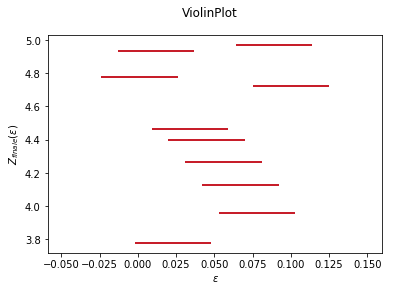

In [24]:
fs = 10  # fontsize
import matplotlib.pyplot as plt
pos=np.linspace(0.001,0.1,10)

r = plt.violinplot(matrix.tolist(),pos,points=100, widths=0.1,
                      showmeans=True, showextrema=True, showmedians=True)
r['cmedians'].set_color('r')
r['cmeans'].set_color('g')

plt.xlabel("$\epsilon$")
plt.ylabel("$Z_{finale}(\epsilon)$")
plt.suptitle("ViolinPlot")
#plt.savefig("violinplot.png", dpi=72 )
plt.show()

In [76]:
pos=np.linspace(0.1,2,20)
